# Bike Sharing Case Study

In [2]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [3]:
# Settings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load and preview data

In [5]:
df1 = pd.read_csv("day.csv")

print('\033[1;4m' + '\nData Shape\n' + '\033[0m')
print(df1.shape)

print('\033[1;4m' + '\nData Information\n' + '\033[0m')
print(df1.info())

print('\033[1;4m' + '\nData Description\n' + '\033[0m')
print(df1.describe())

print('\033[1;4m' + '\nData Preview\n' + '\033[0m')
df1.head()


Data Shape

(730, 16)

Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

Data Description

          instant      seas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Observations from Data Preview

###### - There are no null values
###### - dteday column represents a time trend that is better captured by a separate variable - 'yr'
###### - 'casual' and 'registered' variables are components of dependent variable 'cnt', and not the drivers of dependent variable. Hence it makes sense to drop these variables

## Data Cleaning

In [8]:
# Drop 'instant' column as it is just a record index
df1.drop(columns=['instant'], inplace=True)

# Drop 'dteday' column as it represents a time trend that is better captured by a separate variable - 'yr'
df1.drop(columns=['dteday'], inplace=True)

# Drop 'casual' and 'registered' variables as these are components of dependent variable 'cnt', and not the drivers of dependent variable
df1.drop(columns=['casual', 'registered'], inplace=True)

print(df1.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


#### Mapping Categorical variable entries to meaningful names

In [10]:
# mapping variable names for season
mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df1['season'] = df1['season'].astype(int).map(mapping)

# mapping variable names for season for weathersit
mapping = {1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'}
df1['weathersit'] = df1['weathersit'].astype(int).map(mapping)

# mapping variable names for season for weekday
mapping = {0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}
df1['weekday'] = df1['weekday'].astype(int).map(mapping)

# mapping variable names for season for mnth
mapping = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
df1['mnth'] = df1['mnth'].astype(int).map(mapping)

# mapping variable names for season for yr
mapping = {0:'2018', 1:'2019'}
df1['yr'] = df1['yr'].astype(int).map(mapping)

print(df1.head())

   season    yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring  2018  jan        0   saturday           0       mist  14.110847   
1  spring  2018  jan        0     sunday           0       mist  14.902598   
2  spring  2018  jan        0     monday           1      clear   8.050924   
3  spring  2018  jan        0    tuesday           1      clear   8.200000   
4  spring  2018  jan        0  wednesday           1      clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


## Exploratory Data Analysis

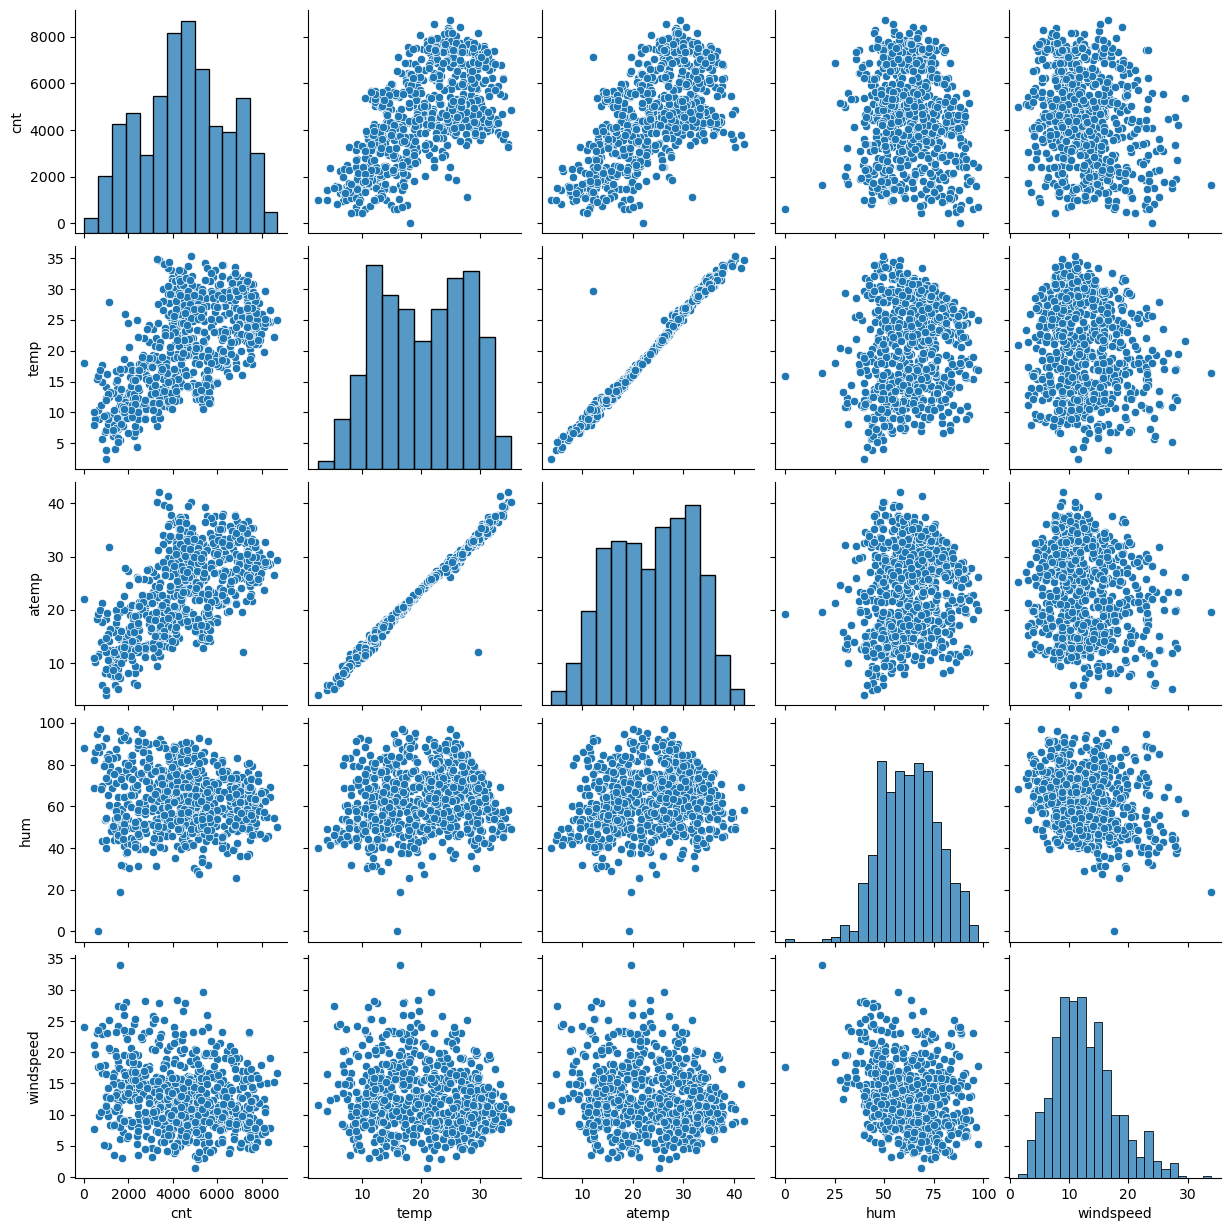

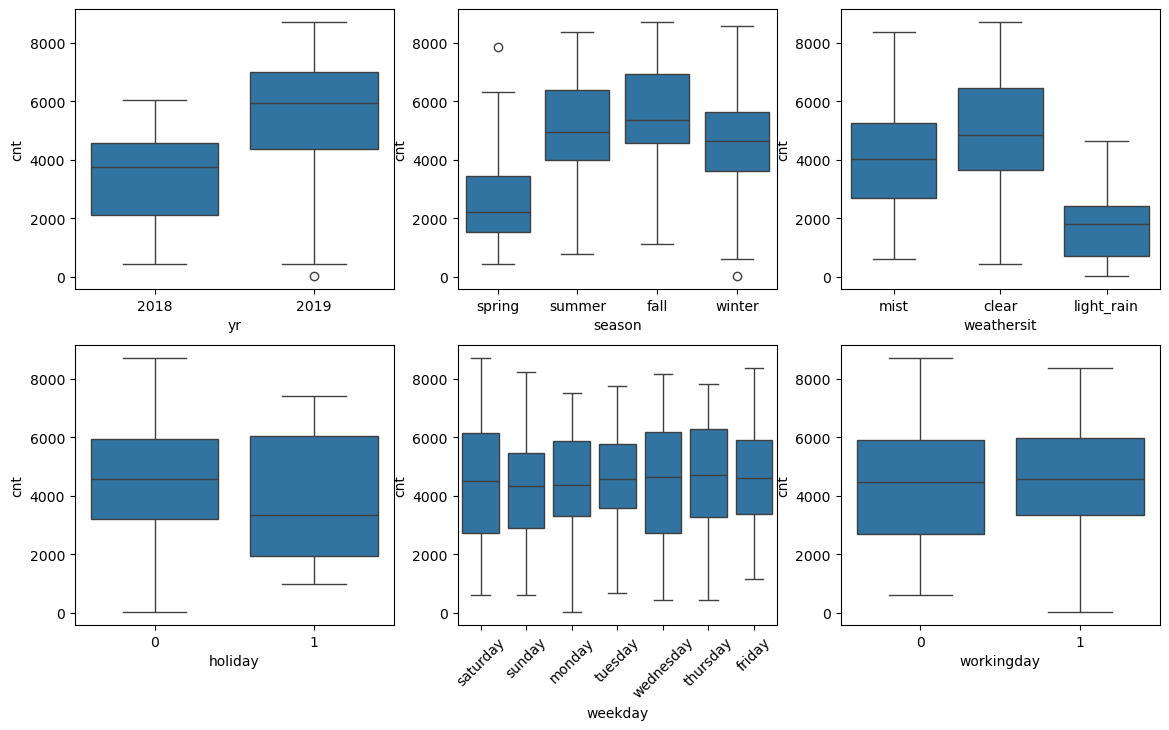

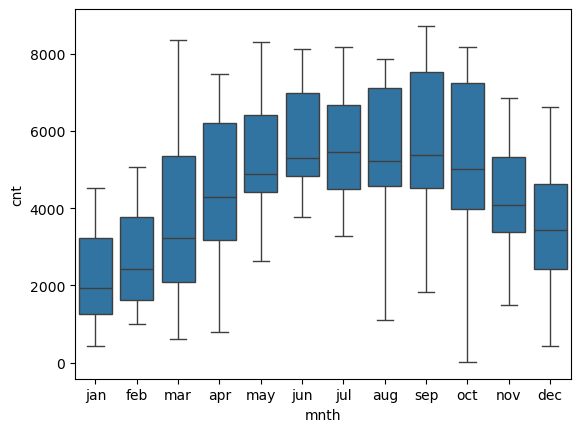

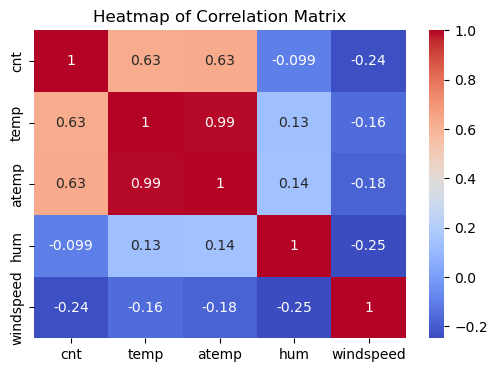

In [12]:
# Pairplots

# Pairplots for numerical variables
sns.pairplot(df1[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

# Boxplots for categorical / ordinal variables
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=df1)
plt.subplot(2,3,2)
sns.boxplot(x='season', y='cnt', data=df1)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=df1)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df1)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df1)
plt.xticks(rotation=45)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df1)
plt.show()

sns.boxplot(x='mnth', y='cnt', data=df1)
plt.show()


# Plotting the Heatmap
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(df1[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Observations from Exploratory Data Analysis

###### - There is noticeable increase in demand of shared bikes in year 2019 as compared against 2018. It must be owed to the rapidly growing business year over year. Average daily demand in 2019 is roughly 50% higher than in 2018
###### - Demand tends to increase from Jan to July and then again demand declines until Dec
###### - Average demand appears to be mostly similar across all weekdays, having slightly different variance across days, especially on Saturday and Wednesday where variance is highest
###### - Bike usage is significantly lower on holidays. It must be due to reduction in usage by office going people on holidays
###### - Average does not seem to be directly affected much whether it is a working day or not. But variance in daily demand is significantly lower during working days. However working day is determined from two components – whether it is a weekday or holiday
###### - Bike usage is significantly higher during fall, followed by summer. It is lowest during spring season
###### - Demand for shared bikes is lowest during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Preparing the Data for Modelling

In [15]:
df2 = df1.copy()

# creating dummy variables for season
season = pd.get_dummies(df2['season'], drop_first=True).astype(int)

# creating dummy variables for weathersit
weathersit = pd.get_dummies(df2['weathersit'], drop_first=True).astype(int)

# creating dummy variables for weekday
weekday = pd.get_dummies(df2['weekday'], drop_first=True).astype(int)

# creating dummy variables for mnth
mnth = pd.get_dummies(df2['mnth'], drop_first=True).astype(int)

# creating dummy variables for yr
yr = pd.get_dummies(df2['yr'], drop_first=True).astype(int)

# concatenate the dummy variables in df2 dataframe, and drop the original variables
df2 = pd.concat([df2, season, weathersit, weekday, mnth, yr], axis=1)
df2 = df2.drop(['season', 'weathersit', 'weekday', 'mnth', 'yr'], axis=1) #drop the original variables
print(df2.head())

   holiday  workingday       temp     atemp      hum  windspeed   cnt  spring  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       1   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       1   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       1   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       1   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       1   

   summer  winter  light_rain  mist  monday  saturday  sunday  thursday  \
0       0       0           0     1       0         1       0         0   
1       0       0           0     1       0         0       1         0   
2       0       0           0     0       1         0       0         0   
3       0       0           0     0       0         0       0         0   
4       0       0           0     0       0         0       0         0   

   tuesday  wednesday  aug  dec  feb  jan  jul  jun  mar  may 

## Splitting into Train and Test set

In [17]:
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)
df_train.columns

(510, 30)
(220, 30)


Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'light_rain', 'mist', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', '2019'],
      dtype='object')

## Rescaling the Train set

          holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.676471    0.537440    0.513156    0.650480    0.320883   
std      0.157763    0.468282    0.225858    0.212410    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.542596    0.529718    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  light_rain        mist  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.513499    0.243137    0.247059    0.247059    0.029412    0.345098   
std      0.224421    0.4293

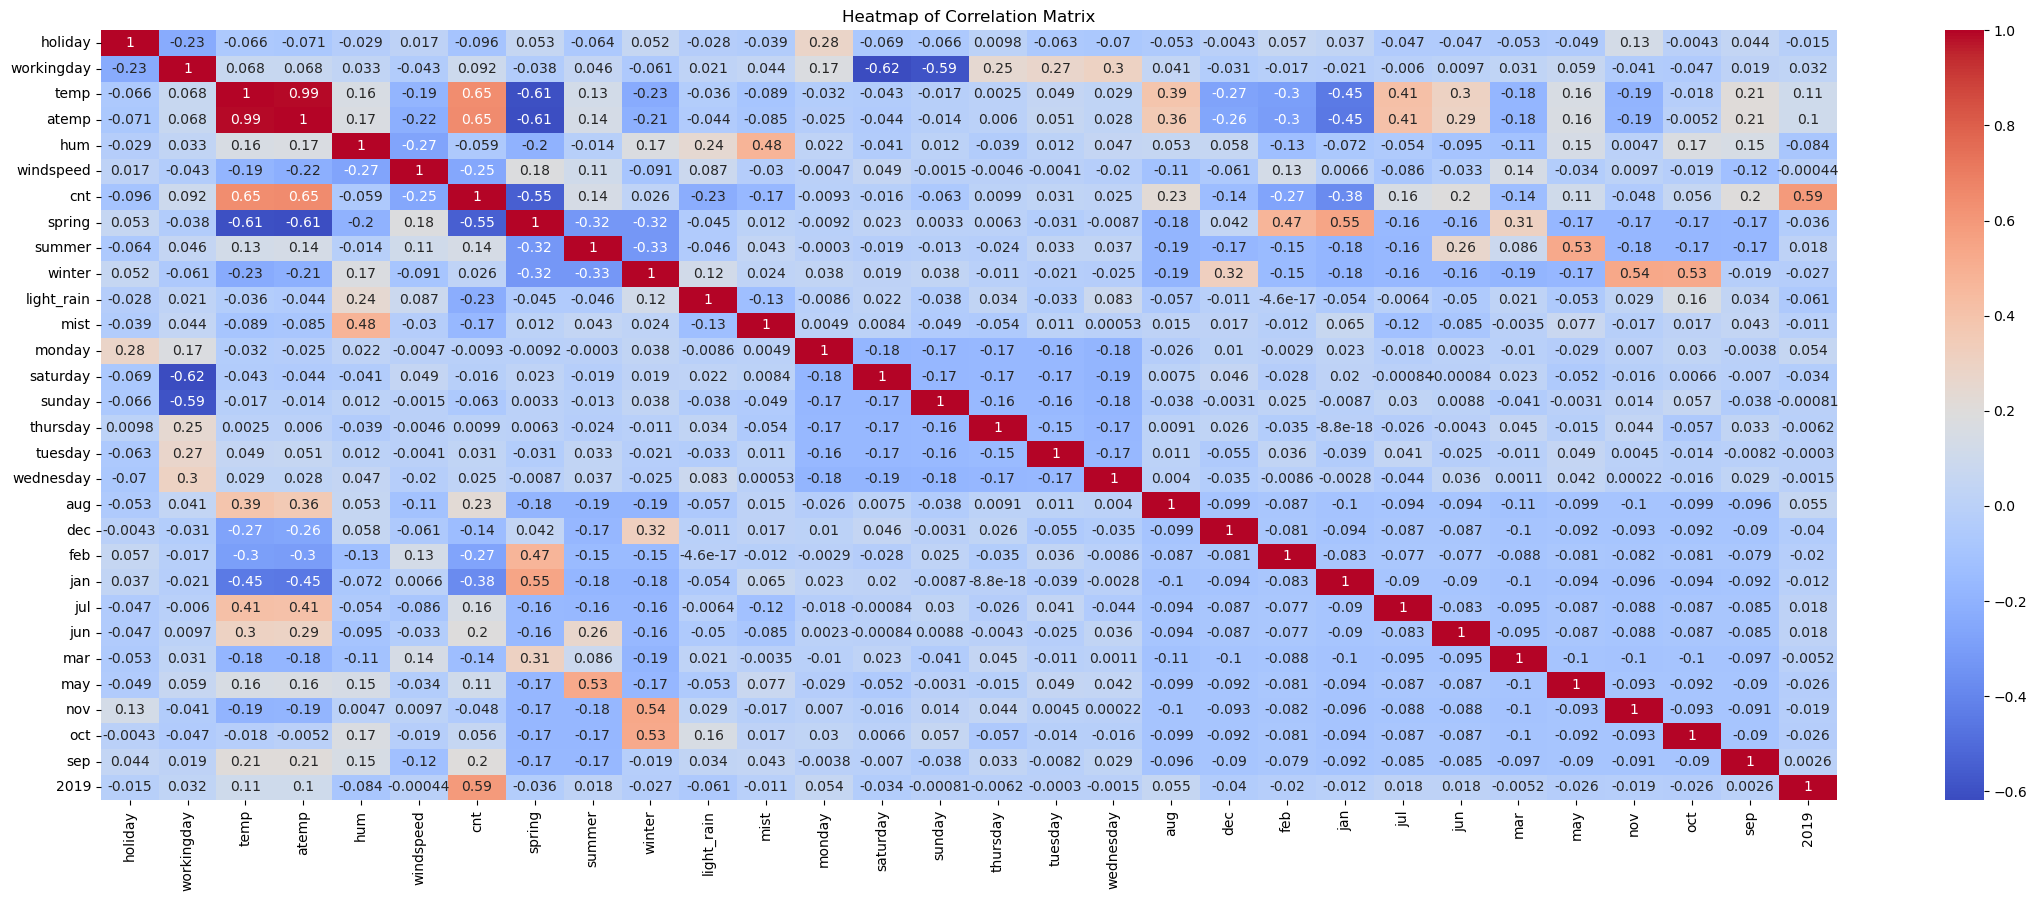

In [19]:
# Normalisation (Min-Max scaling)
# It will automatically take care of outliers

scaler = MinMaxScaler()  # instantiate an object

num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']  # only numerical variables need to be normalised

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # fit and transform on numerical data
print(df_train.describe())

# Plotting the Heatmap
plt.figure(figsize=(28, 10))  # Set the figure size
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Training the Model

In [21]:
# segregating dependent and independent variables
y_train = df_train.pop('cnt')     # dependent variable
X_train = df_train                # independent variables

# build a model with all independent variables
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.81e-180
Time:                        03:47:14   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'atemp' should be dropped as it has high VIF (implying severe multicollinearity) and highest p-value (implying its insignificance)

#### Model after dropping 'atemp' variable

In [24]:
# Dropping 'atemp' variable
X_train = X_train.drop(['atemp'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.00e-181
Time:                        03:47:15   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2431      0.035      6.888      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'spring' should be dropped as it has high VIF (implying severe multicollinearity) and highest p-value (implying its insignificance)

#### Model after dropping 'spring' variable

In [27]:
# Dropping 'spring' variable
X_train = X_train.drop(['spring'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.68e-182
Time:                        03:47:16   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2209      0.032      6.891      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'holiday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'holiday' variable

In [30]:
# Dropping 'holiday' variable
X_train = X_train.drop(['holiday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.68e-182
Time:                        03:47:18   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2249      0.049      4.626      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'oct' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'oct' variable

In [33]:
# Dropping 'oct' variable
X_train = X_train.drop(['oct'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.32e-183
Time:                        03:47:19   Log-Likelihood:                 525.82
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     484   BIC:                            -889.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.046      4.986      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'wednesday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'wednesday' variable

In [36]:
# Dropping 'wednesday' variable
X_train = X_train.drop(['wednesday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.25e-184
Time:                        03:47:20   Log-Likelihood:                 525.74
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2259      0.045      4.982      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'jun' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'jun' variable

In [39]:
# Dropping 'jun' variable
X_train = X_train.drop(['jun'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.01e-185
Time:                        03:47:21   Log-Likelihood:                 525.66
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2250      0.045      4.972      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'thursday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'thursday' variable

In [42]:
# Dropping 'thursday' variable
X_train = X_train.drop(['thursday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.66e-186
Time:                        03:47:21   Log-Likelihood:                 525.56
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -907.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2229      0.045      4.960      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'mar' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'mar' variable

In [45]:
# Dropping 'mar' variable
X_train = X_train.drop(['mar'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.23e-187
Time:                        03:47:22   Log-Likelihood:                 525.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     488   BIC:                            -913.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2083      0.041      5.036      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'jul' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'jul' variable

In [48]:
# Dropping 'jul' variable
X_train = X_train.drop(['jul'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.07e-187
Time:                        03:47:23   Log-Likelihood:                 524.86
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -918.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2098      0.041      5.079      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'tuesday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'tuesday' variable

In [51]:
# Dropping 'tuesday' variable
X_train = X_train.drop(['tuesday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.59e-188
Time:                        03:47:23   Log-Likelihood:                 524.22
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     490   BIC:                            -923.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2086      0.041      5.050      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'monday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'monday' variable

In [54]:
# Dropping 'monday' variable
X_train = X_train.drop(['monday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.16e-189
Time:                        03:47:23   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -928.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1997      0.040      4.941      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'may' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'may' variable

In [57]:
# Dropping 'may' variable
X_train = X_train.drop(['may'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.74e-190
Time:                        03:47:23   Log-Likelihood:                 522.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.040      4.806      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'sunday' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'sunday' variable

In [60]:
# Dropping 'sunday' variable
X_train = X_train.drop(['sunday'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.45e-190
Time:                        03:47:24   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2352      0.033      7.228      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### 'hum' should be dropped as it has very high p-value (implying its insignificance)

#### Model after dropping 'hum' variable

In [63]:
# Dropping 'hum' variable
X_train = X_train.drop(['hum'], axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model output
print(lr_model.summary())

# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.23e-188
Time:                        03:47:24   Log-Likelihood:                 512.76
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     494   BIC:                            -925.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.026      5.910      0.0

#### Interpretation
###### High value of Adj R-squared implies good model fit
###### All the variables have VIF fairly below 10, indicating no severe multicollinearity
###### All the variables have p-value within significance level of 0.05, indicating their significance in explaining the 'cnt' variable
###### F-statistic is very high indicating a good overall model fit
###### Now the model overall seems to be reasonably fitted and stable

## Residual Analysis for validating the assumptions of Linear Regression 

Plotting for predictor: workingday


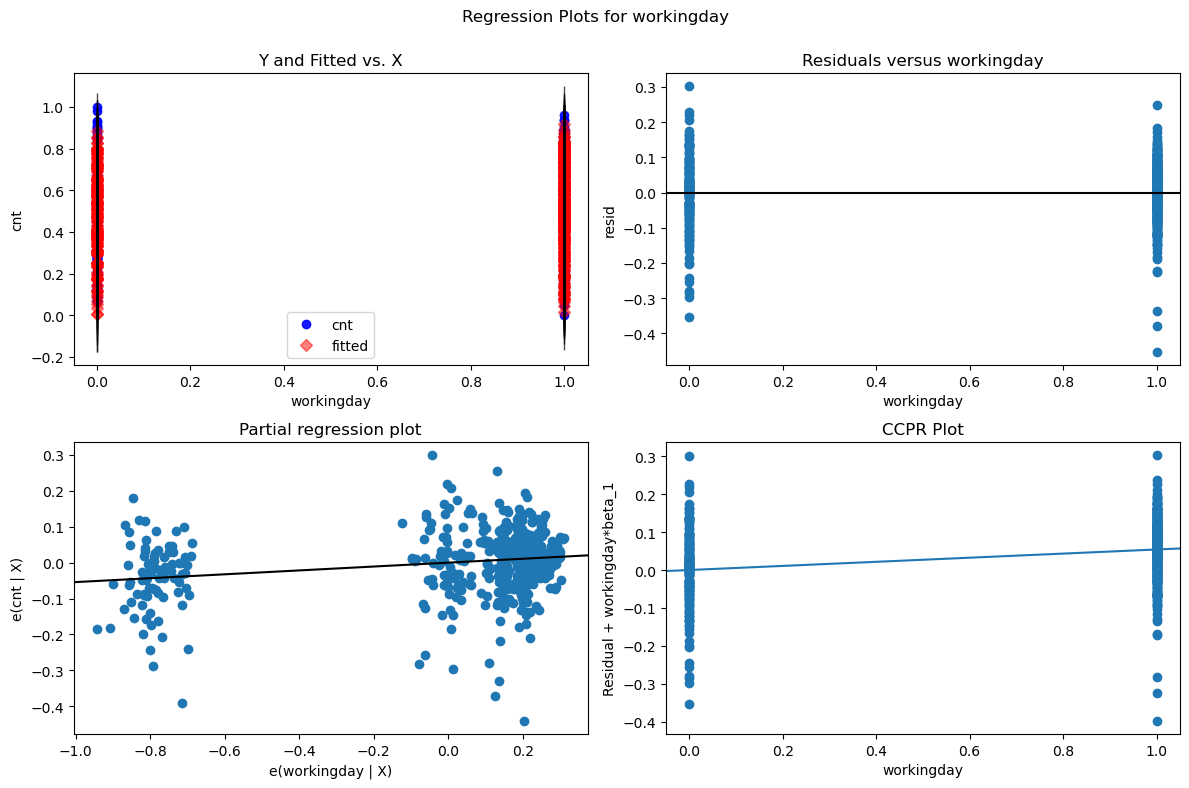

Plotting for predictor: temp


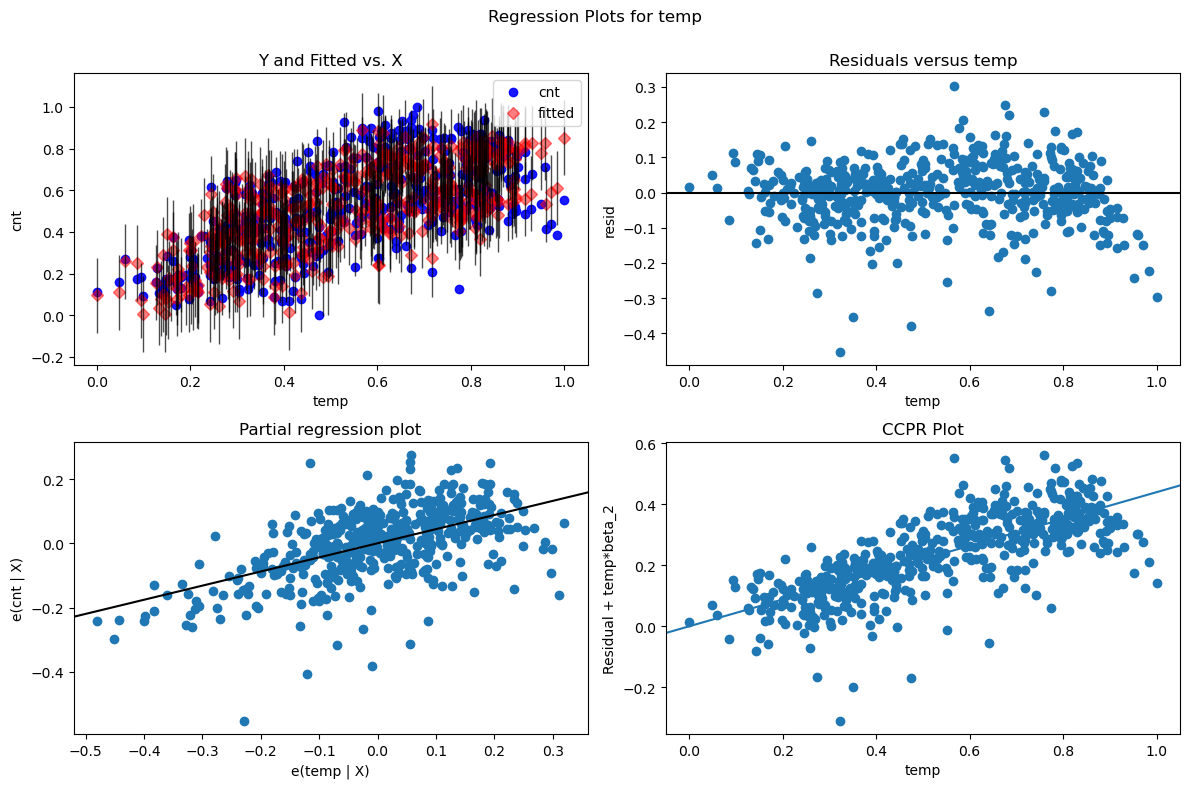

Plotting for predictor: windspeed


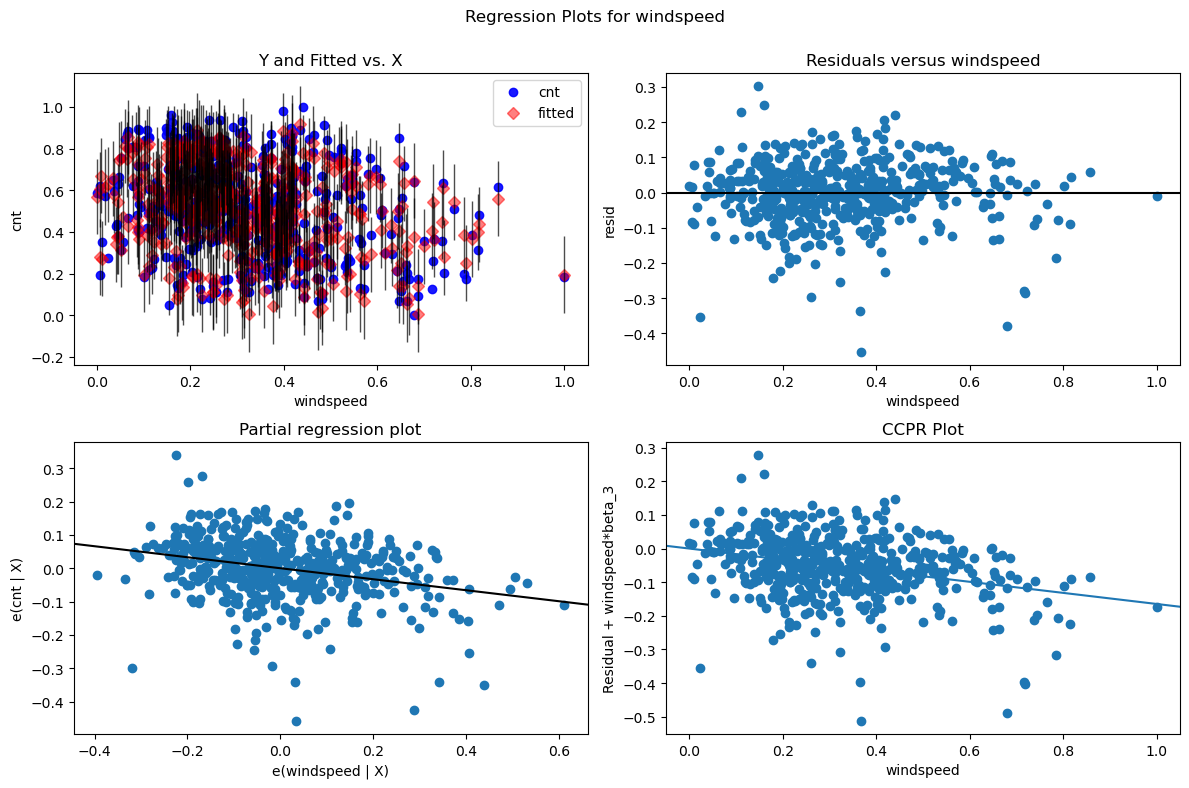

Plotting for predictor: summer


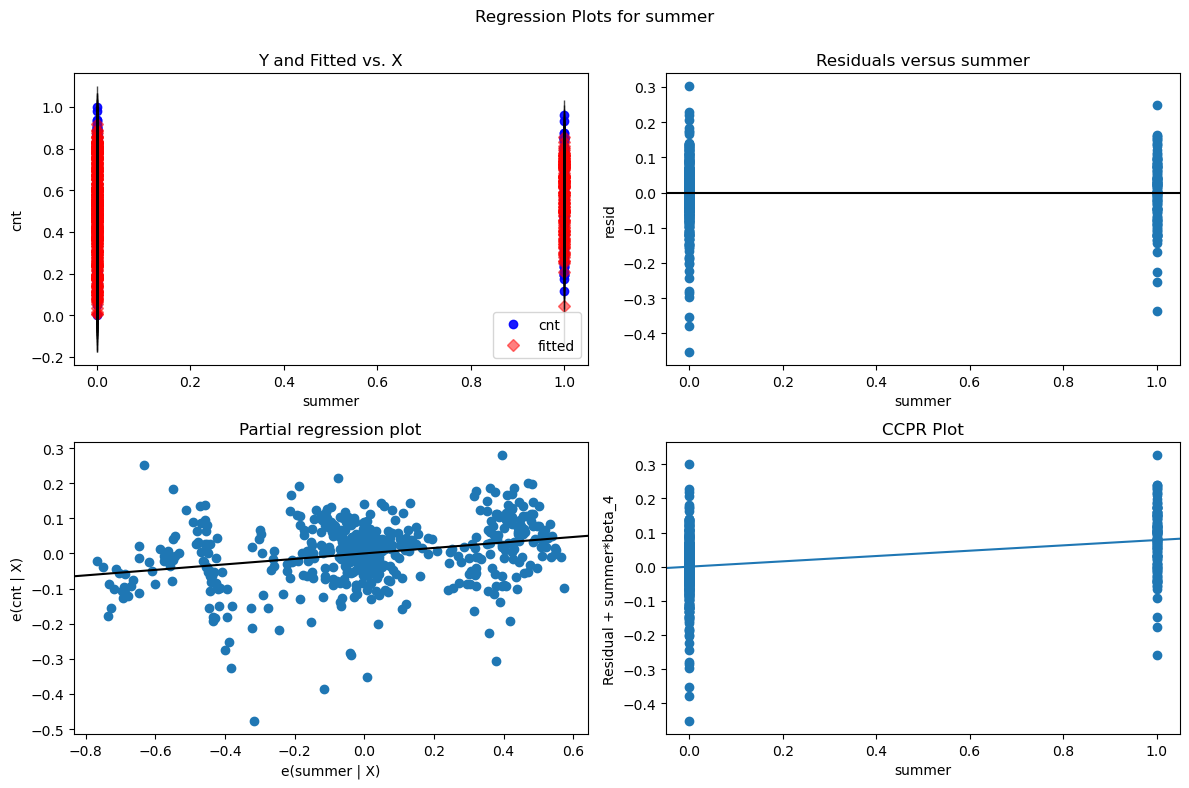

Plotting for predictor: winter


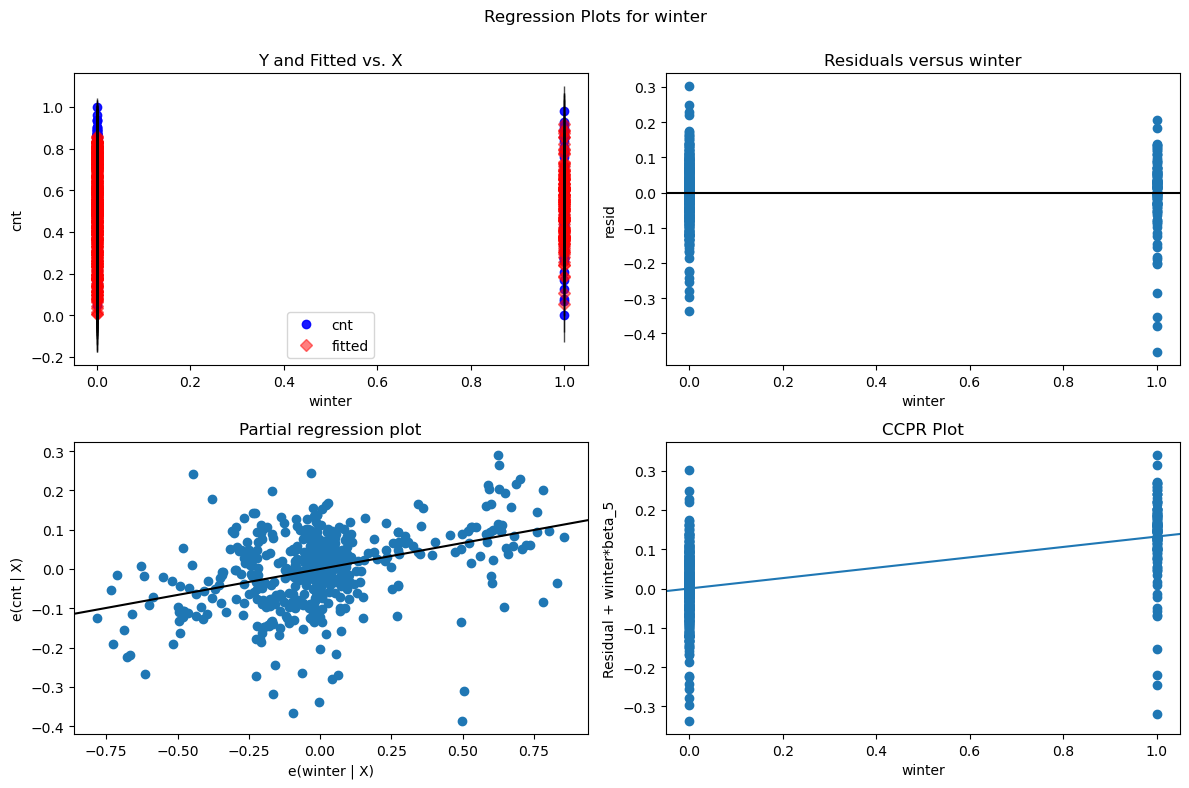

Plotting for predictor: light_rain


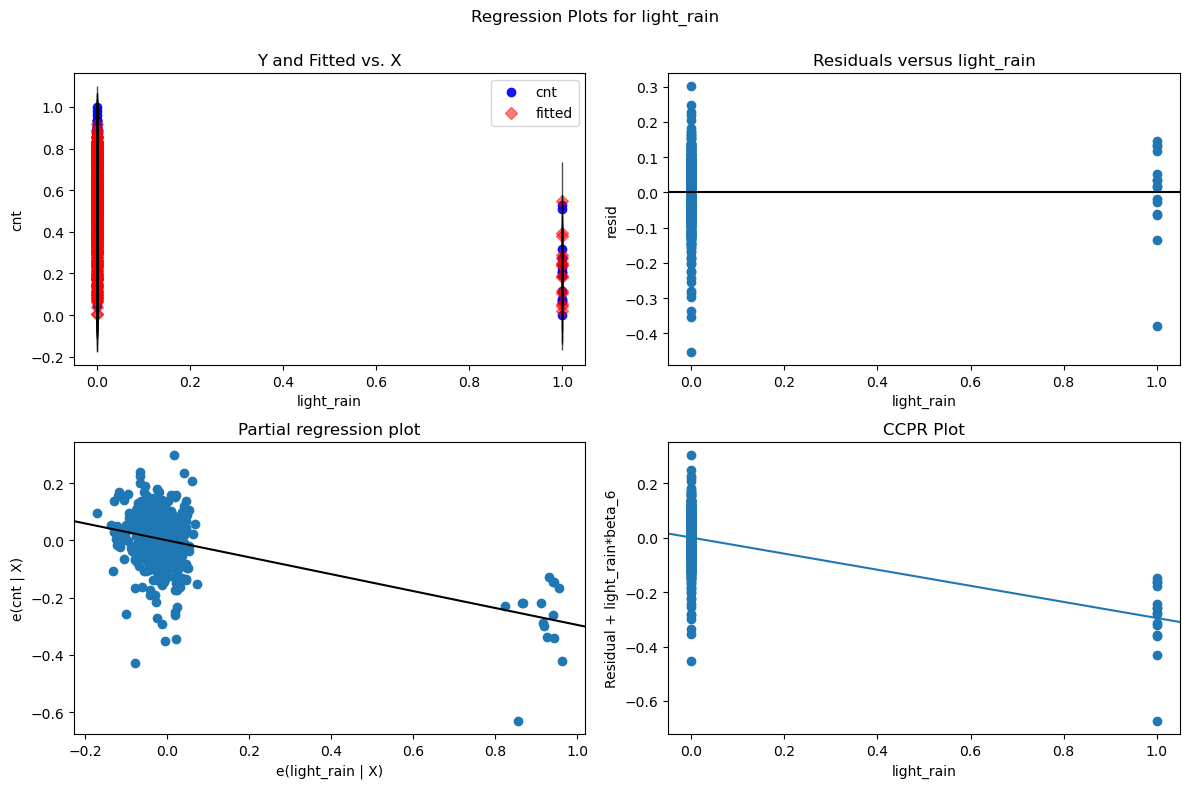

Plotting for predictor: mist


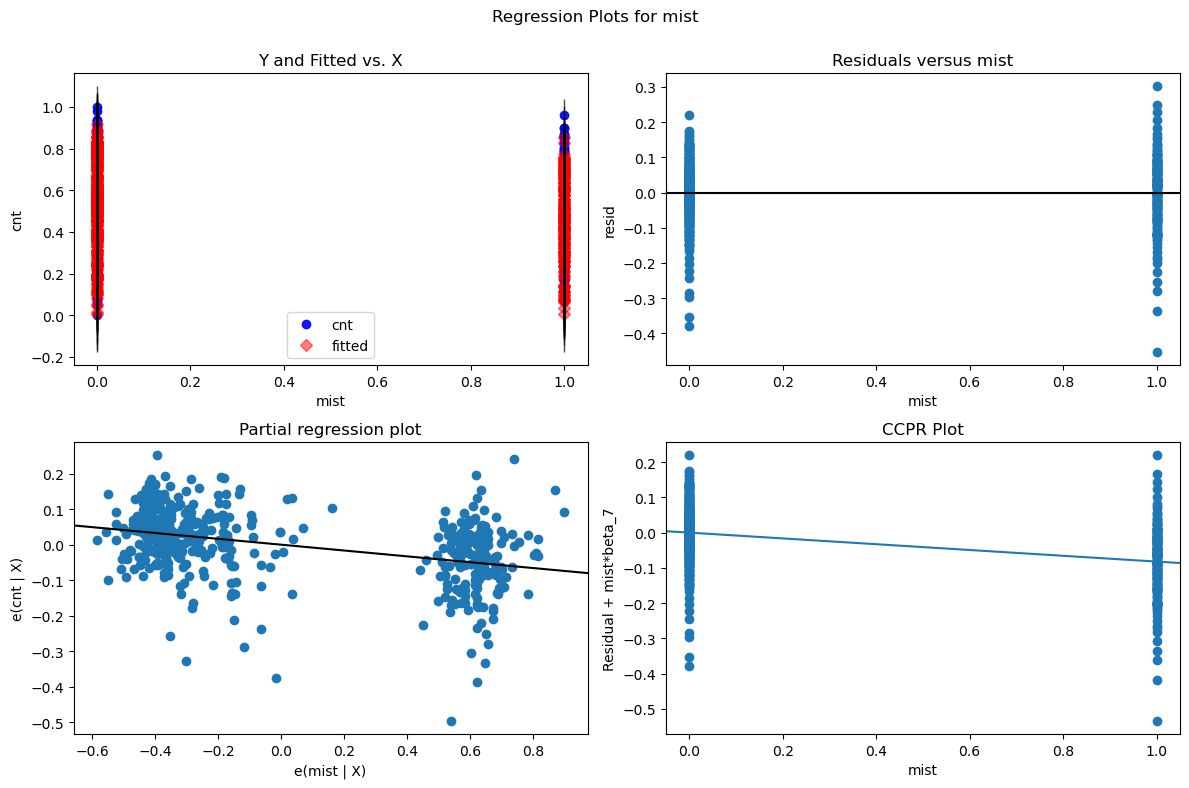

Plotting for predictor: saturday


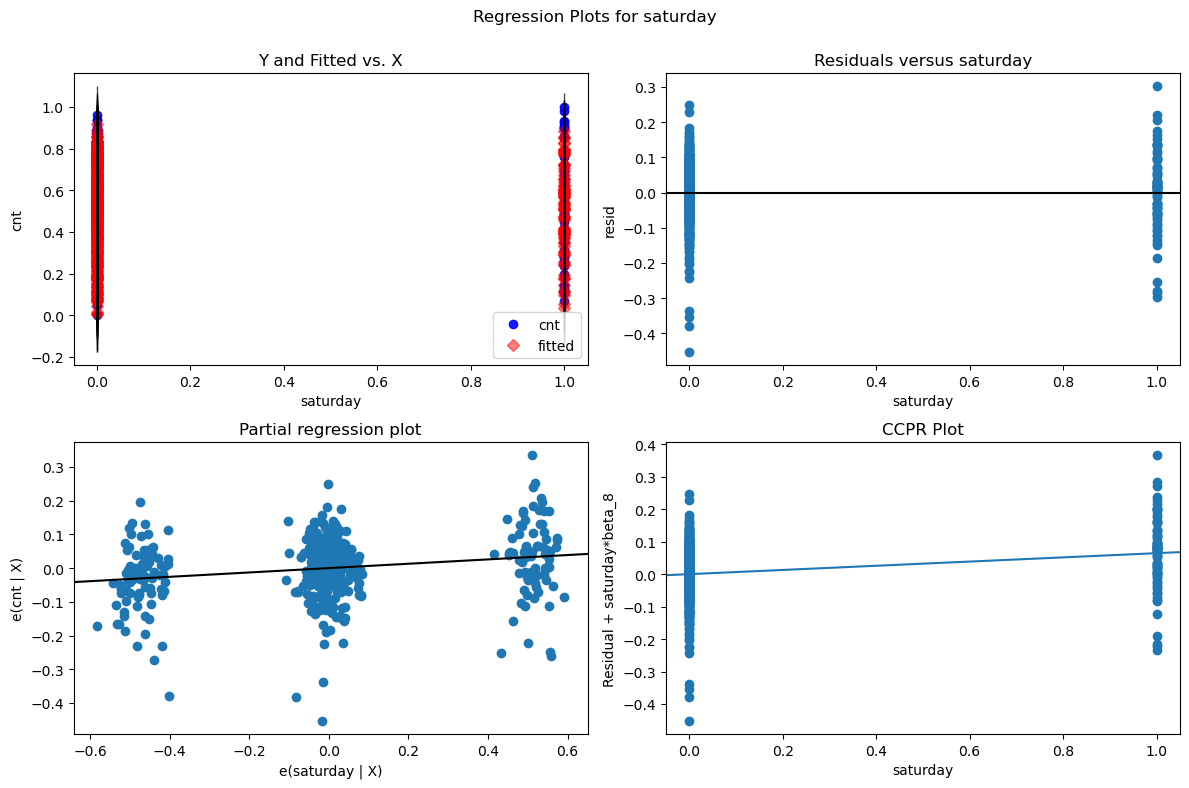

Plotting for predictor: aug


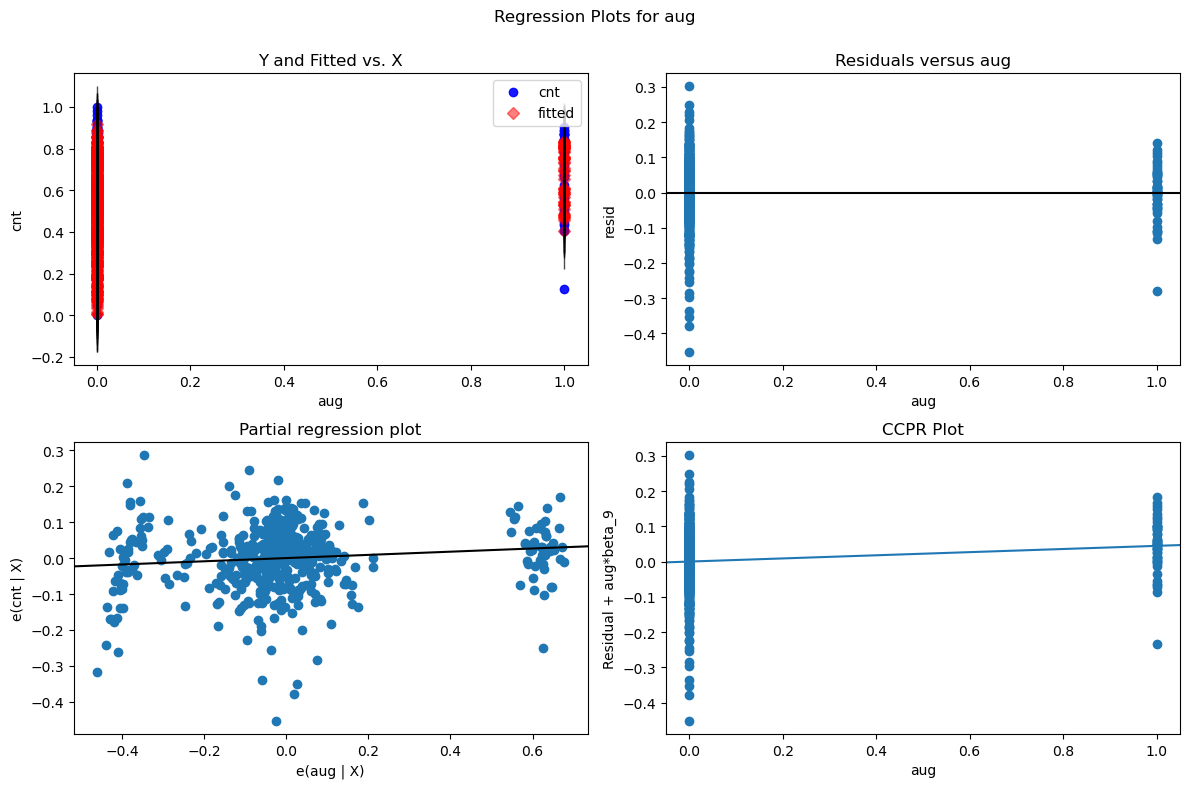

Plotting for predictor: dec


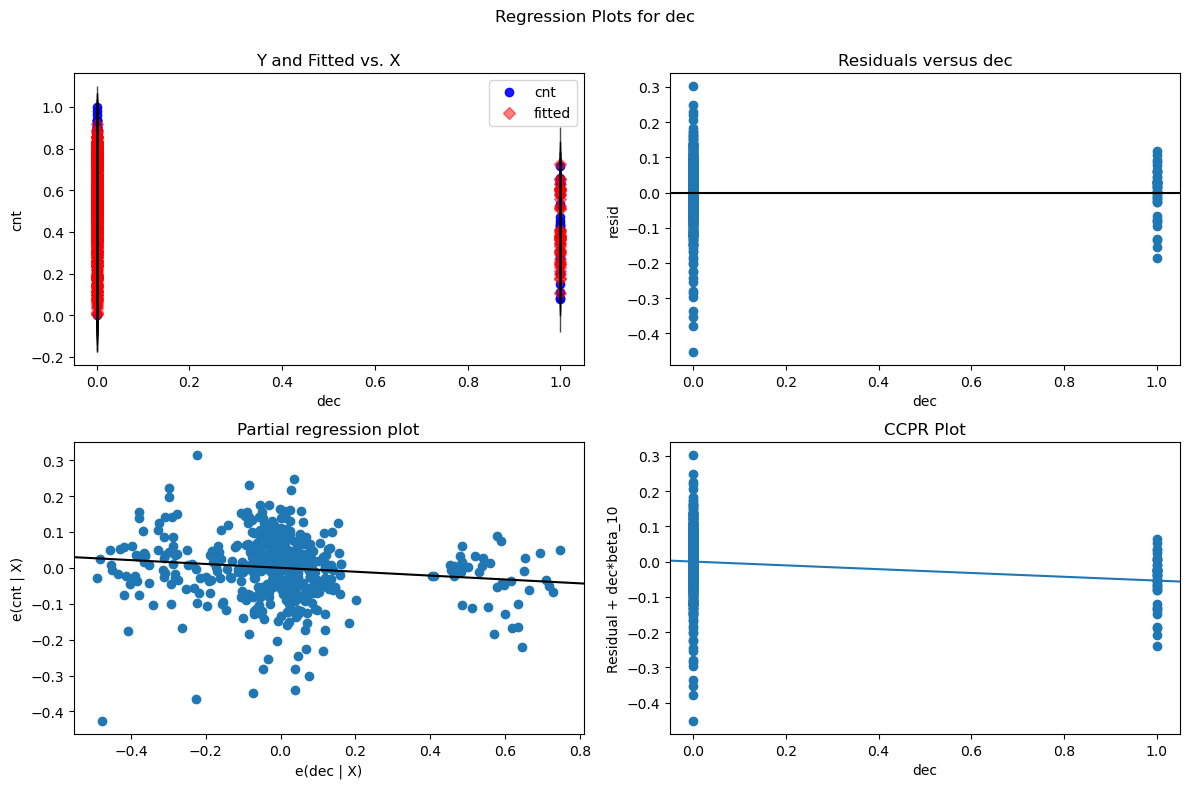

Plotting for predictor: feb


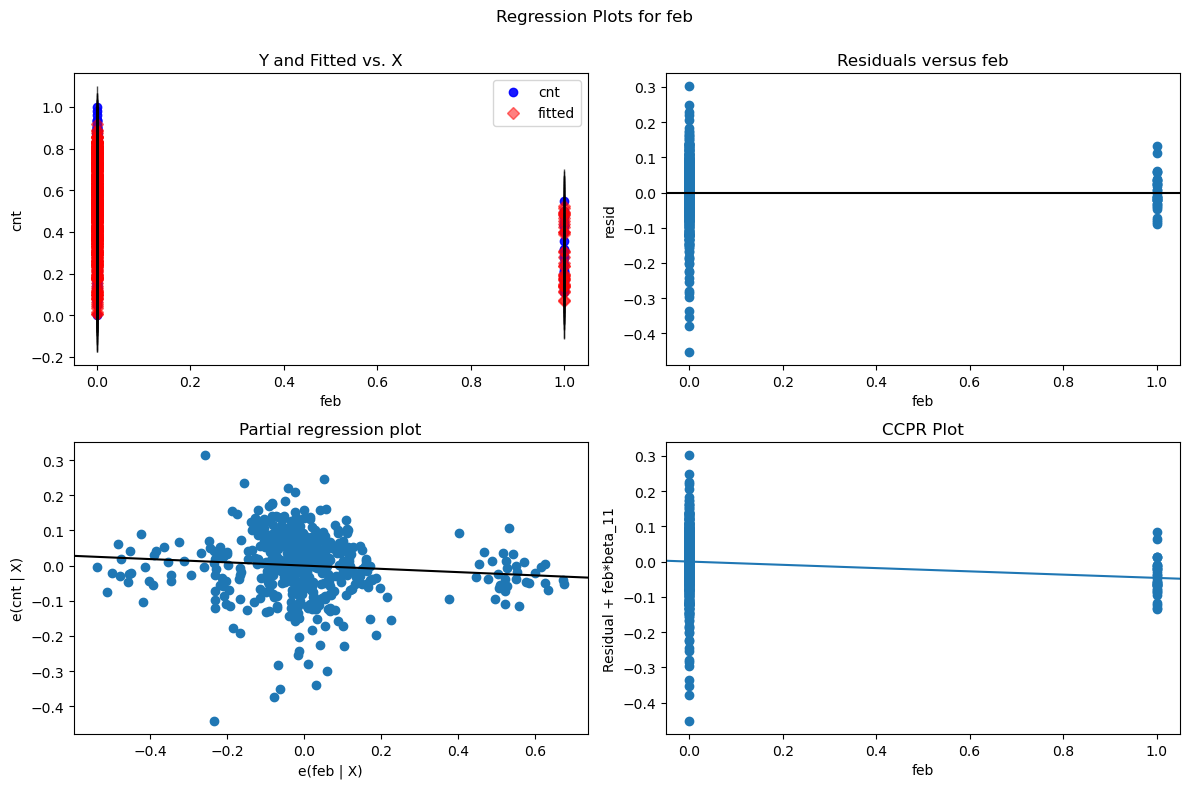

Plotting for predictor: jan


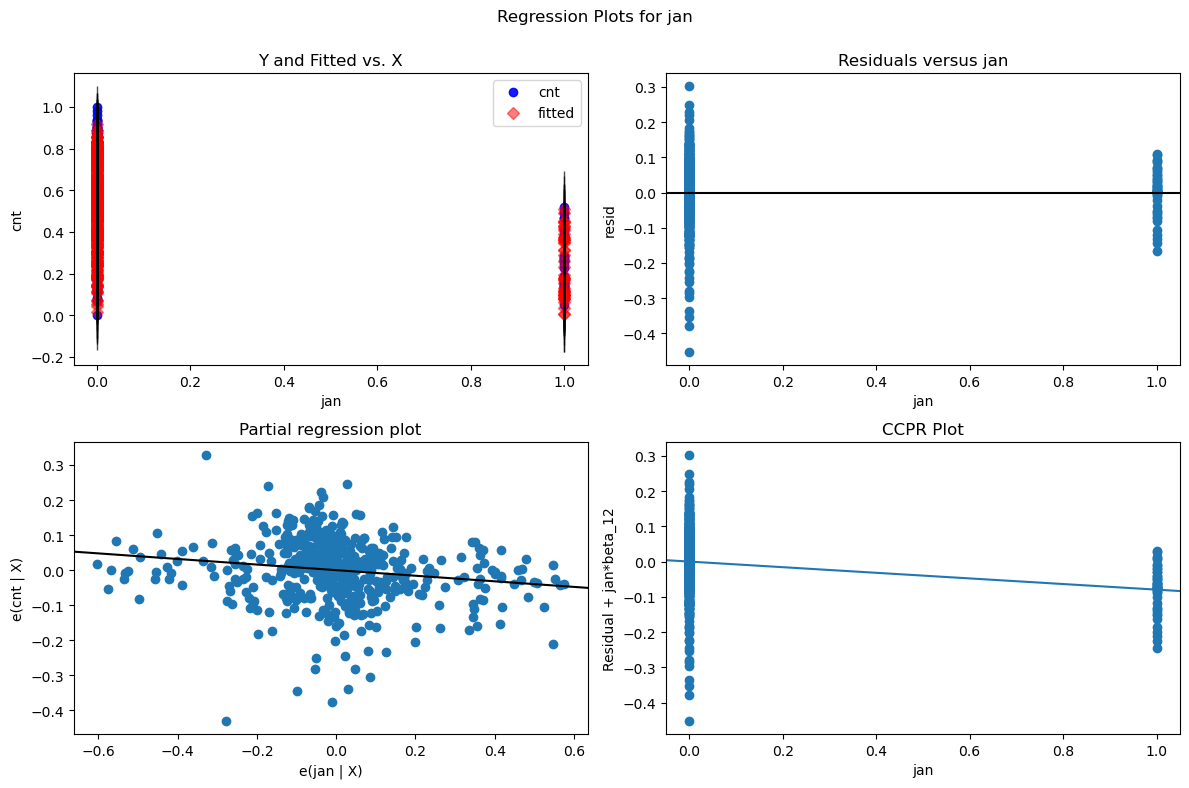

Plotting for predictor: nov


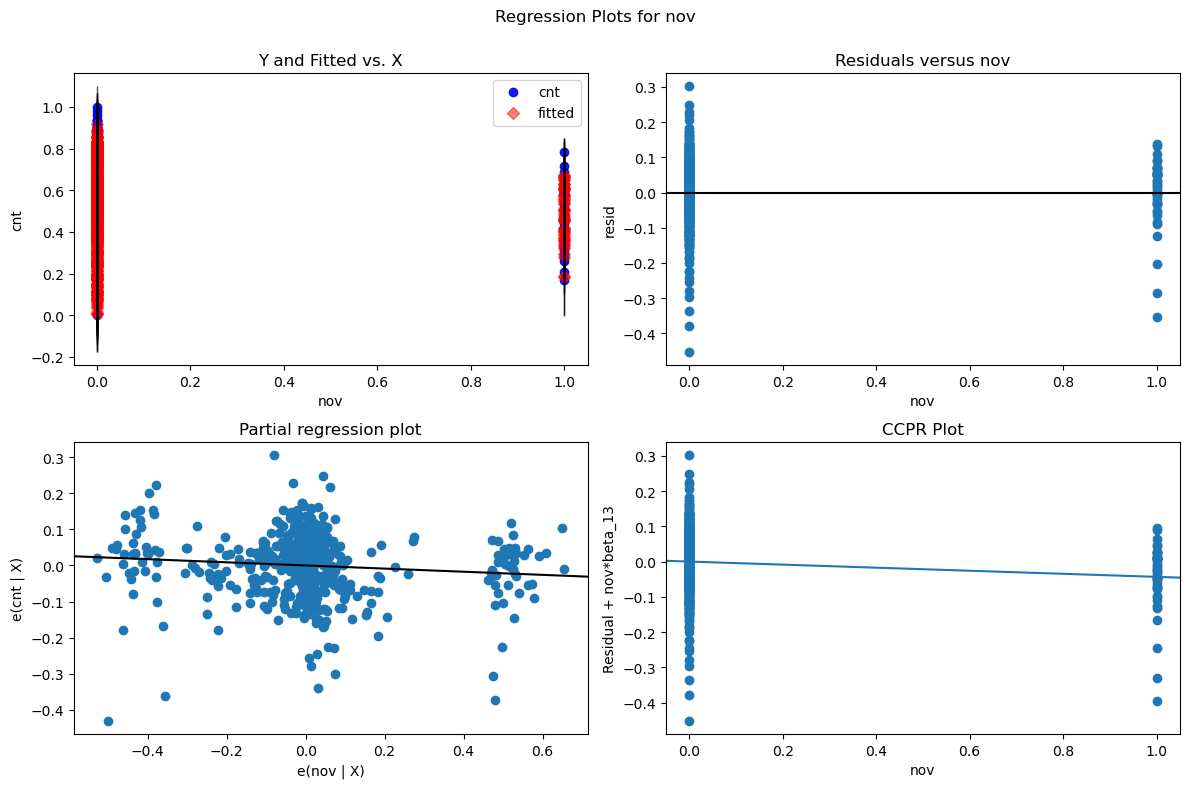

Plotting for predictor: sep


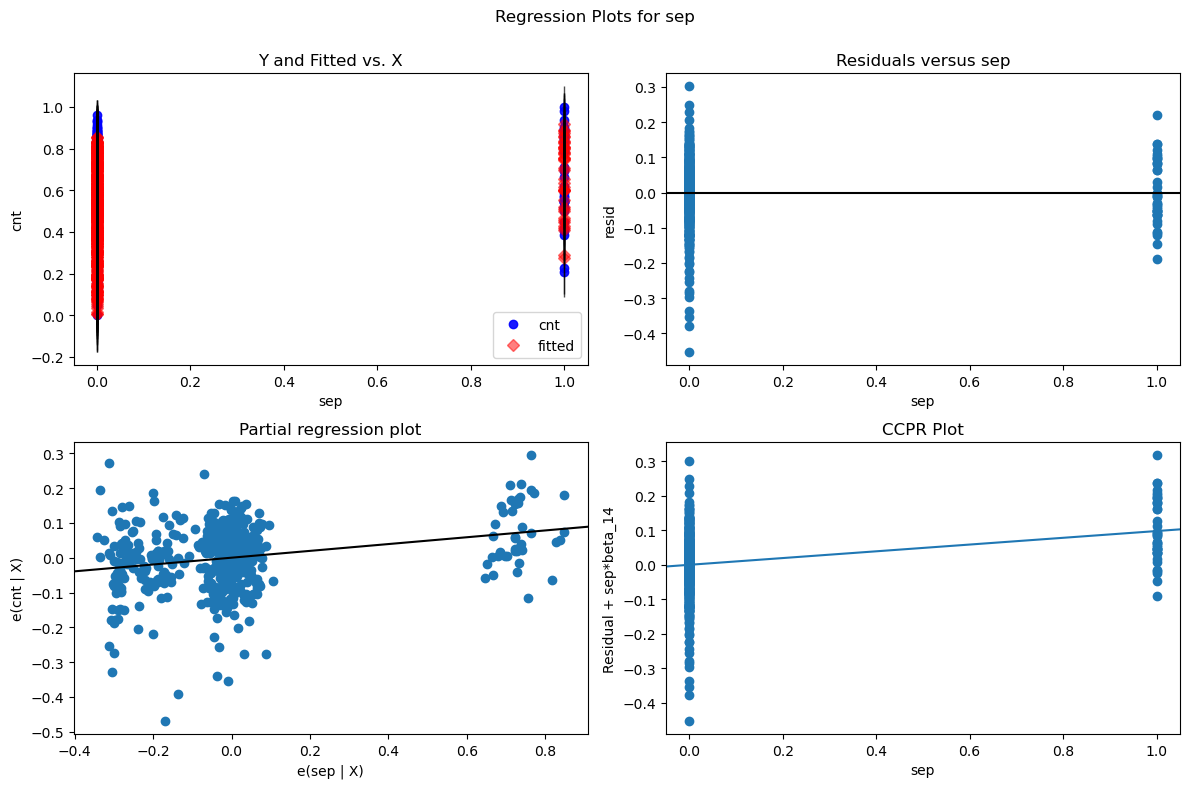

Plotting for predictor: 2019


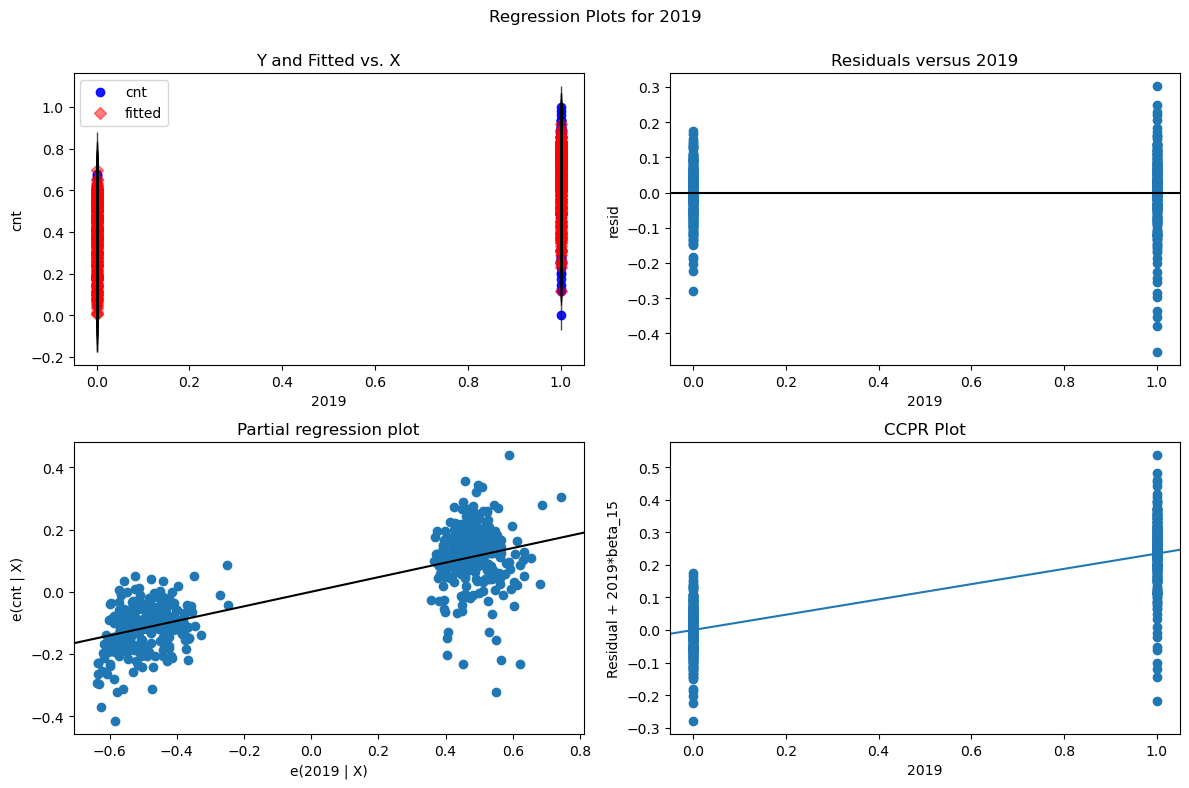

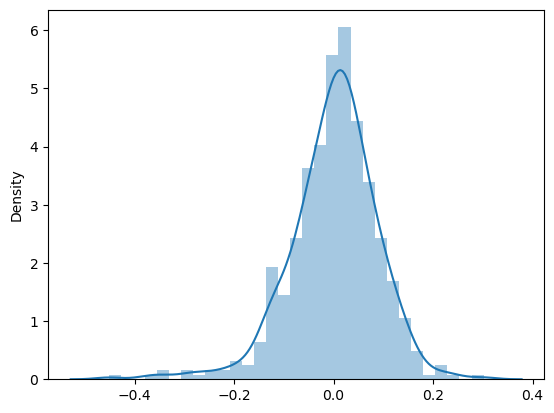


Durbin-Watson Test: 2.039185023317992


In [66]:
# Residual plots for linearity and homoscedasticity
for predictor in X_train_sm.columns[1:]:  # Exclude the constant
    print(f"Plotting for predictor: {predictor}")
    sm.graphics.plot_regress_exog(lr_model, predictor, fig=plt.figure(figsize=(12, 8)))
    plt.show()

# checking for normality of residuals
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# checking for independence of residuals - Durbin-Watson 
print('\033[1;4m' + '\nDurbin-Watson Test:' + '\033[0m', durbin_watson(lr_model.resid))

#### Interpretation
###### Homoscedasticity - Residuals vs predicted values plot indicate that variance of residuals remain reasonably constant across all levels of the predicted values
###### Linearity of the Relationship - Plots indicate linear relationship between predictors and the target variable. Residuals vs predicted values plot indicates that residuals don't not show any discernible pattern
###### Normality of Residuals - Residuals are clearly normally distributed, centered around zero
###### Independence of Residuals - Durbin-Watson test value close to 2 indicates no autocorrelation
###### No Multicollinearity - As already indicated ny VIF values before, all the variables having VIF fairly below 10, indicate no severe multicollinearity

## Evaluation on Test Set

#### Rescaling the Test Dataset

In [70]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']  # only numerical variables

df_test[num_vars] = scaler.transform(df_test[num_vars]) # only transform the numerical data in test set using train set Min-Max
print(df_test.describe())

          holiday  workingday        temp       atemp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.036364    0.700000    0.558718    0.532847    0.638221    0.313293   
std      0.187620    0.459303    0.233187    0.217401    0.148694    0.159584   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.355429    0.344870    0.529197    0.198843   
50%      0.000000    1.000000    0.558172    0.544652    0.625590    0.300126   
75%      0.000000    1.000000    0.755981    0.713308    0.743798    0.402718   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

              cnt      spring      summer      winter  light_rain        mist  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.522154    0.254545    0.263636    0.236364    0.027273    0.318182   
std      0.219163    0.4365

#### Predicting and Evaluating the Test Dataset

In [72]:
# segregating dependent and independent variables
y_test = df_test.pop('cnt')     # dependent variable

# independent variables; keep only the variables that are part of final model
X_test = df_test[['workingday', 'temp', 'windspeed', 'summer', 'winter', 'light_rain',
       'mist', 'saturday', 'aug', 'dec', 'feb', 'jan', 'nov', 'sep', '2019']]

# add constant
X_test_sm = sm.add_constant(X_test)

# predict
y_test_pred = lr_model.predict(X_test_sm)

# evaluate
print('\033[1;4m' + '\nR-squared value on Test Dataset' + '\033[0m')
r2_score(y_true=y_test, y_pred=y_test_pred)


R-squared value on Test Dataset


0.8095370585769067

#### Interpretation and Explanation of Final Model
###### Based on adjusted R-squared values of trainig and test data set, it can be concluded that model has a good overall fit and is fairly stable
###### All the assumptions of linear regression model have been validated
###### As expected, attributes related to temperature, weather and windspeed have significant contribution in explaining the demand for shared bikes
    - People prefer to ride bikes on hotter days and hence increase in temperature tends to increase the bike usage
    - Weather conditions such as Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist discourage people to travel in open and hence negatively impact the demand for bikes
    - Increased windspeeds may make bike ride uncomfortable and hence result in lower demand
###### Bike demand in 2019 was significantly higher than in 2018. A portion of this increased demand can be attributed to increase in popularity bike sharing over the year 
###### Pepole prefer shared bikes on weekdays and Saturdays
###### Season also has influence on demand. People don't prefer shared bikes in months from Nov to Feb. 